## Predicting survivors of the Titanic with machine learning

Of the 2240 people on board the Titanic, an estimated 1503 died (according to a British investigation). It seems some groups of people were more likely to survive than others.

Using passenger data, these logistic regression models predict which passengers were more likely to survive based on key details such as age, sex, and class.

The datasets were provided as part of a [Kaggle compeitition](https://www.kaggle.com/competitions/titanic/overview).

In [156]:
## Initialising libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [157]:
## Importing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Checking the data

In [158]:
## Checking the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [162]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [163]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Cleaning the datasets

In [164]:
## Move 'Survived' column to the front of training data for easy viewing
train_data = train_data[['Survived'] + [x for x in train_data.columns if x != 'Survived']]

In [165]:
## Insert 'Survived' column into test data
test_data.insert(0, 'Survived', '')

In [166]:
## Filling null values in Age columns with median values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [167]:
## Filling null values in Fare column in test data with median values
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [168]:
## One-hot encoding the Sex column in training data
encoded_data = pd.get_dummies(train_data['Sex'], dtype=int)
train_data = pd.merge(train_data, encoded_data, left_index=True, right_index=True)
train_data.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [169]:
## One-hot encoding the Sex column in test data
encoded_data = pd.get_dummies(test_data['Sex'], dtype=int)
test_data = pd.merge(test_data, encoded_data, left_index=True, right_index=True)
test_data.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


In [170]:
## Dropping the Cabin columns as there are too many null values
train_data.drop(train_data.columns[[10]], axis=1, inplace=True)
test_data.drop(test_data.columns[[10]], axis=1, inplace=True)

In [171]:
## Dropping unnecessary columns for the model
train_data.drop(train_data.columns[[3, 4, 8, 10]], axis=1, inplace=True)
test_data.drop(test_data.columns[[3, 4, 8, 10]], axis=1, inplace=True)

In [172]:
## Checking datasets
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    int64  
 8   male         891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [173]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    object 
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   female       418 non-null    int64  
 8   male         418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


## Making the model

<Axes: >

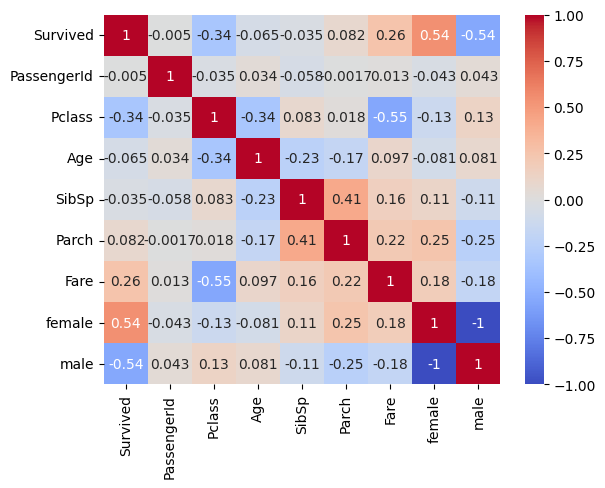

In [174]:
## Plot the heatmap
corr_mat = train_data.corr(numeric_only = True)
sns.heatmap(corr_mat, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))

In [175]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   female       891 non-null    int64  
 8   male         891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


### Logistic regression model

In [176]:
## Selecting the training data for the model
X_train = train_data.iloc[:, 2:8]
y_train = train_data.iloc[:, 0]

In [177]:
## Selecting the testing data for the model
X_test = test_data.iloc[:, 2:8]
y_test = test_data.iloc[:, 0]

In [178]:
## Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
## Creating and fitting the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [180]:
## Making predictions
y_pred_logreg = log_reg.predict(X_test)

In [181]:
## Showing output of prediction model
log_reg_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_logreg})
log_reg_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [182]:
## Inserting outputs into test dataset to see results
test_data['Survived'] = log_reg_output['Survived']
test_data.head(10)

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,892,3,34.5,0,0,7.8292,0,1
1,0,893,3,47.0,1,0,7.0000,1,0
2,0,894,2,62.0,0,0,9.6875,0,1
3,0,895,3,27.0,0,0,8.6625,0,1
4,1,896,3,22.0,1,1,12.2875,1,0
5,0,897,3,14.0,0,0,9.2250,0,1
6,1,898,3,30.0,0,0,7.6292,1,0
7,0,899,2,26.0,1,1,29.0000,0,1
8,1,900,3,18.0,0,0,7.2292,1,0
9,0,901,3,21.0,2,0,24.1500,0,1


In [183]:
## Visualising output
log_reg_output_count = pd.DataFrame(log_reg_output['Survived'].value_counts().reset_index(name='Count'))
log_reg_output_count

,Survived,Count
0,0,257
1,1,161


Text(0.5, 1.0, 'Log regression model prediction')

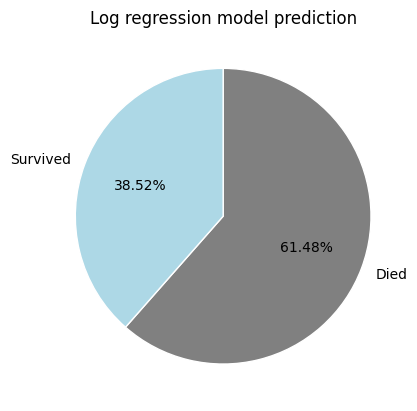

In [184]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(log_reg_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Log regression model prediction')

In [185]:
## Getting survivor rate by sex
sex_count = test_data.groupby(['female', 'male', 'Survived']).size().reset_index(name='Count')
sex_count

,female,male,Survived,Count
0,0,1,0,248
1,0,1,1,18
2,1,0,0,9
3,1,0,1,143


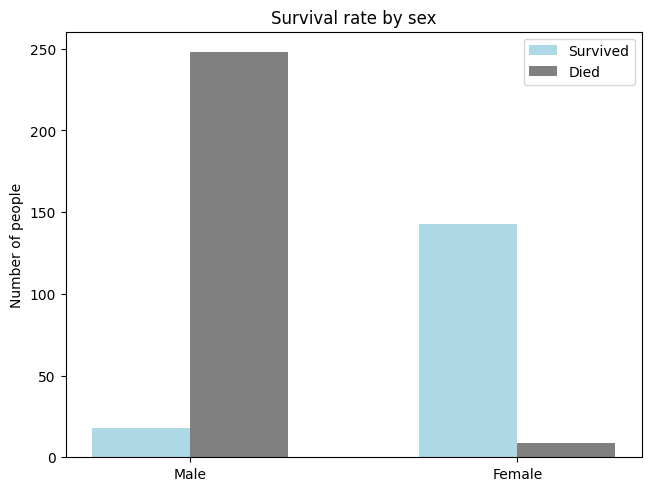

In [186]:
## Visualising survivor rate by sex
fig, ax = plt.subplots(layout='constrained')
Survived_bars = np.array([18, 143])
Died_bars = np.array([248, 9])
width = 0.3
X = np.arange(len(Survived_bars))
s1bars = ax.bar(X - width / 2, Survived_bars, width, color='lightblue')
s2bars = ax.bar(X + width / 2, Died_bars, width, color='gray')

ax.set_title('Survival rate by sex')
ax.set_ylabel("Number of people")
ax.set_xticks([0,1])
ax.set_xticklabels(['Male', 'Female'])
ax.legend((s1bars, s2bars), ('Survived', 'Died'))


In [187]:
## Getting survivor rate by pclass (ticket class)
pclass_count = test_data.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
pclass_count

,Pclass,Survived,Count
0,1,0,39
1,1,1,68
2,2,0,63
3,2,1,30
4,3,0,155
5,3,1,63


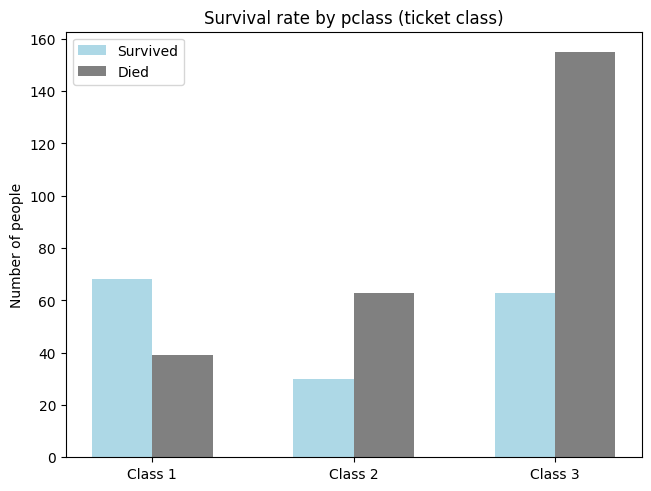

In [188]:
## Visualising survivor rate by pclass (ticket class)
fig, ax = plt.subplots(layout='constrained')
Survived_bars = np.array([68, 30, 63])
Died_bars = np.array([39, 63, 155])
width = 0.3
X = np.arange(len(Survived_bars))
s1bars = ax.bar(X - width / 2, Survived_bars, width, color='lightblue')
s2bars = ax.bar(X + width / 2, Died_bars, width, color='gray')

# ax.set_ylim([0, 250])
ax.set_title('Survival rate by pclass (ticket class)')
ax.set_ylabel("Number of people")
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.legend((s1bars, s2bars), ('Survived', 'Died'))

In [189]:
## Filtering dataframe for survivors only
survivor_df = test_data[test_data['Survived'] == 1] 
survivor_df

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male
4,1,896,3,22.0,1,1,12.2875,1,0
6,1,898,3,30.0,0,0,7.6292,1,0
8,1,900,3,18.0,0,0,7.2292,1,0
12,1,904,1,23.0,1,0,82.2667,1,0
14,1,906,1,47.0,1,0,61.1750,1,0
...,...,...,...,...,...,...,...,...,...
409,1,1301,3,3.0,1,1,13.7750,1,0
410,1,1302,3,27.0,0,0,7.7500,1,0
411,1,1303,1,37.0,1,0,90.0000,1,0
412,1,1304,3,28.0,0,0,7.7750,1,0


Text(0.5, 0, 'Age range')

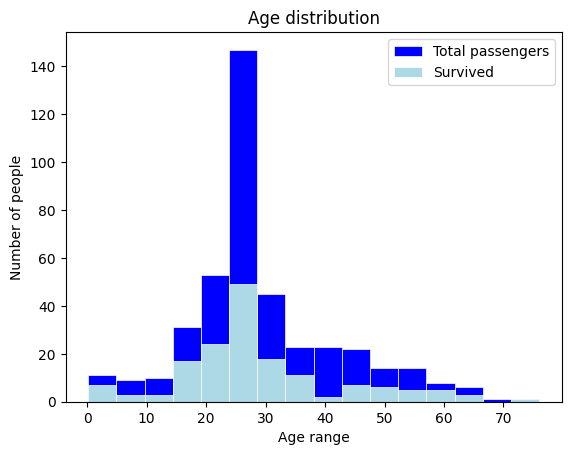

In [190]:
## Visualising distribution of age ranges amongst survivors
fig, ax = plt.subplots()

ax.hist(test_data['Age'], bins=16, linewidth=0.5, color='blue', edgecolor="white")
ax.hist(survivor_df['Age'], bins=16, linewidth=0.5, color='lightblue', edgecolor="white")
labels= ['Total passengers','Survived']
ax.legend(labels)
ax.set_title('Age distribution')
ax.set_ylabel("Number of people")
ax.set_xlabel("Age range")

The model predicted:
* Women were more likely to survive than men
* 1st class passengers had greater survival rates
* Age did not have much of an impact

To improve model accuracy:
* Look into the Titanic's history and find out the cut-off age for children​
* Attempt different normalization methods on variables
* Add variables to the data such as passenger/crew

### Training data surivival rate for comparison

In [191]:
## Getting survivor rate from training data for comparison
survivor_count = pd.DataFrame(train_data['Survived'].value_counts().reset_index(name='Count'))
survivor_count

,Survived,Count
0,0,549
1,1,342


Text(0.5, 1.0, 'Training data survival rate')

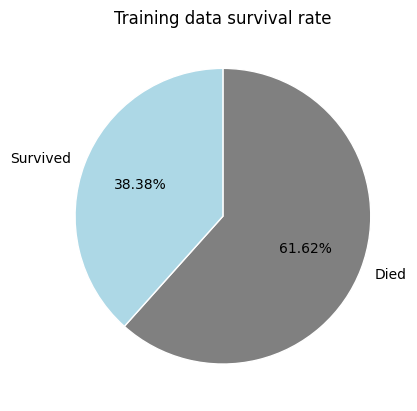

In [192]:
## Visualising survivor rate from training data
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(survivor_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Training data survival rate')

## Testing other models

### kNN model

In [193]:
## Creating a kNN model
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [194]:
## Making predictions
y_pred_knn = knn_model.predict(X_test)

In [195]:
## Output of prediction model
knn_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_knn})
knn_model_output_count = pd.DataFrame(log_reg_output['Survived'].value_counts().reset_index(name='Count'))
knn_model_output_count

,Survived,Count
0,0,257
1,1,161


Text(0.5, 1.0, 'kNN model prediction')

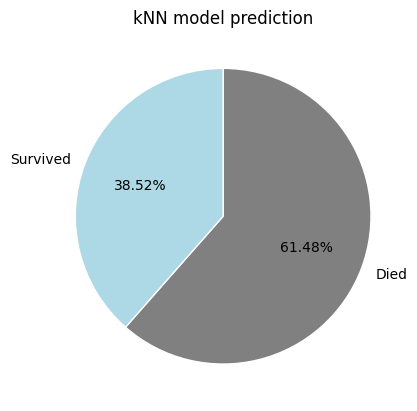

In [196]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(knn_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('kNN model prediction')

### Decision tree models

In [197]:
## Creating the decision tree models

## Create a decision tree with criterion gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## Entropy criterion with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion= 'entropy')

## Max depth of 3
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [198]:
## Fitting the models
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)
decision_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [199]:
## Making predictions
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)

In [200]:
## Showing output of Gini prediction model
gini_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_gini})
gini_model_output_count = pd.DataFrame(gini_model_output['Survived'].value_counts().reset_index(name='Count'))
gini_model_output_count

,Survived,Count
0,0,224
1,1,194


Text(0.5, 1.0, 'Gini model prediction')

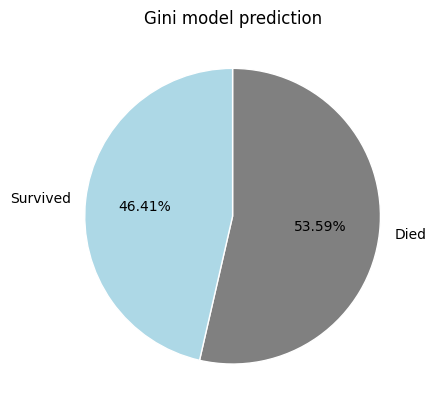

In [201]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(gini_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Gini model prediction')

In [202]:
## Output of Entropy prediction model
entropy_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_entropy})
entropy_model_output_count = pd.DataFrame(entropy_model_output['Survived'].value_counts().reset_index(name='Count'))
entropy_model_output_count

,Survived,Count
0,0,221
1,1,197


Text(0.5, 1.0, 'Entropy model prediction')

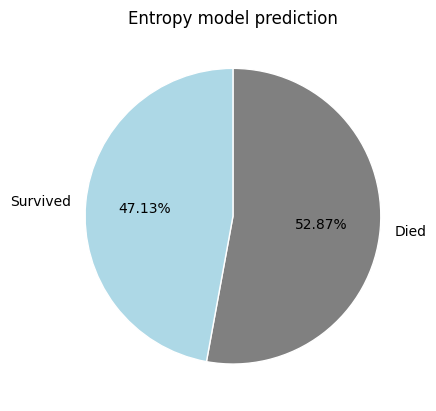

In [203]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(entropy_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Entropy model prediction')

In [204]:
## Output of Entropy prediction model
depth_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_depth})
depth_model_output_count = pd.DataFrame(depth_model_output['Survived'].value_counts().reset_index(name='Count'))
depth_model_output_count

,Survived,Count
0,0,268
1,1,150


Text(0.5, 1.0, 'Depth model prediction')

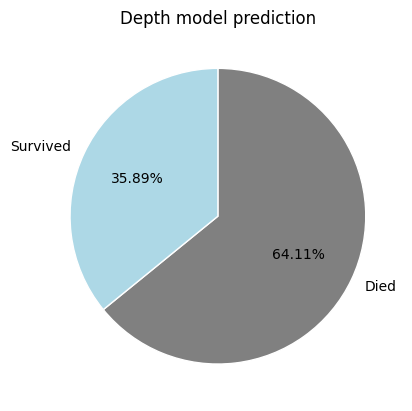

In [205]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(depth_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Depth model prediction')

### SVM models

In [206]:
## Creating the SVM models

## Creating an svm model with a linear kernel
clflinear = svm.SVC(kernel='linear')

## Creating an svm model with a signmoid kernel
clfsigmoid = svm.SVC(kernel='sigmoid')

## Creating an svm model with a radial basis function kernel
clfrbf = svm.SVC(kernel='rbf')

In [207]:
## Fit the models
clflinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [208]:
## Making predictions
y_pred_linear = clflinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [209]:
## Output of the linear prediction model
linear_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_linear})
linear_model_output_count = pd.DataFrame(linear_model_output['Survived'].value_counts().reset_index(name='Count'))
linear_model_output_count

,Survived,Count
0,0,266
1,1,152


Text(0.5, 1.0, 'Linear model prediction')

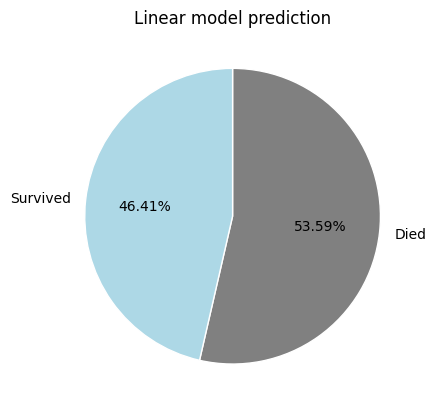

In [210]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(gini_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Linear model prediction')

In [211]:
## Output of the sigmoid prediction model
sigmoid_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_sigmoid})
sigmoid_model_output_count = pd.DataFrame(sigmoid_model_output['Survived'].value_counts().reset_index(name='Count'))
sigmoid_model_output_count

,Survived,Count
0,0,273
1,1,145


Text(0.5, 1.0, 'Sigmoid model prediction')

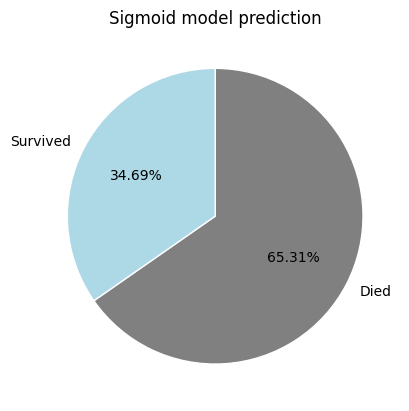

In [212]:
## Creating a pie chart
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(sigmoid_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Sigmoid model prediction')

In [213]:
## Output of the rbf prediction model
rbf_model_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_rbf})
rbf_model_output_count = pd.DataFrame(rbf_model_output['Survived'].value_counts().reset_index(name='Count'))
rbf_model_output_count

,Survived,Count
0,0,264
1,1,154


Text(0.5, 1.0, 'RBF model prediction')

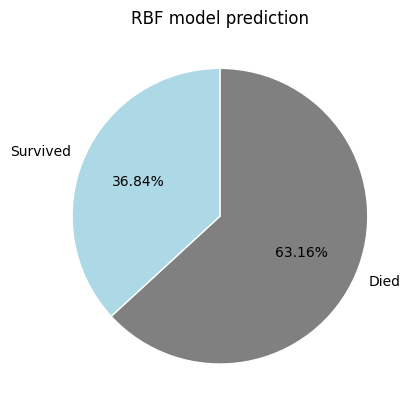

In [214]:
## Visualising output
fig, ax = plt.subplots()
labels = ['Died', 'Survived']
colors = ['gray', 'lightblue']
ax.pie(rbf_model_output_count['Count'], labels=labels, colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('RBF model prediction')